In [178]:
import pandas as pd
file=pd.read_csv(r"C:\Users\Hp\Downloads\user_interactions.csv")
data=file.copy()
data.describe()
data.shape
data.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [181]:
data.columns

Index(['User_ID', 'Page_Viewed', 'Time_Spent_Seconds'], dtype='object')

In [182]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB
None


In [57]:
data.isnull().sum()  ## zero null entries

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [58]:
## checking for duplicated records
data.duplicated().sum()

1

In [59]:
## removing null entries
data.dropna(inplace=True)

In [60]:
## removing duplicated records
data.drop(data.index[data.duplicated()],inplace=True)

In [61]:
data.duplicated().sum()

0

In [62]:
data.shape

(4999, 3)

In [63]:
## remove outliers using interquartile range
import numpy as np
def remove_outliers_iqr(data,column, k=1.5):   ## k standard value=1.5

    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    cond1=data[column] >= lower_bound
    cond2=(data[column] <= upper_bound)
    return data[cond1 & cond2]
cleaned_data=remove_outliers_iqr(data,'Time_Spent_Seconds',k=1.5)
print(cleaned_data)

        User_ID    Page_Viewed  Time_Spent_Seconds
0     User_3198       Homepage                 560
1      User_126  Category Page                 168
2     User_1376  Category Page                 122
3     User_1117      Cart Page                 329
4     User_3683  Category Page                 391
...         ...            ...                 ...
4995  User_3045  Checkout Page                 284
4996  User_1583      Cart Page                 322
4997  User_2627  Checkout Page                 559
4998  User_4976   Product Page                 373
4999  User_1770       Homepage                 104

[4999 rows x 3 columns]


In [163]:
cleaned_data.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


In [162]:
grouped=cleaned_data.groupby('Page_Viewed')
grouped.count()
count=cleaned_data['Page_Viewed'].value_counts()
print(count)
## most visited page is Homepage
## Second most visited page is Cart Page

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     971
Product Page      953
Name: Page_Viewed, dtype: int64


In [172]:
## most visited page
print("Most Visited Page:",count.idxmax())

Most Visited Page: Homepage


In [176]:
## average time spent on each page
print("Average Time Spent on each page:")
print(grouped.mean())

Average Time Spent on each page:
               Time_Spent_Seconds
Page_Viewed                      
Cart Page              302.819404
Category Page          297.868177
Checkout Page          306.760364
Homepage               310.215311
Product Page           304.562434


In [166]:
grouped.size()

Page_Viewed
Cart Page        1041
Category Page     971
Checkout Page     989
Homepage         1045
Product Page      953
dtype: int64

In [167]:
## click thru rate
click_thru_rate=(grouped.size())/cleaned_data.shape[0]
print('Click Through rate for the pages:')
print(click_thru_rate)

Click Through rate for the pages:
Page_Viewed
Cart Page        0.208242
Category Page    0.194239
Checkout Page    0.197840
Homepage         0.209042
Product Page     0.190638
dtype: float64


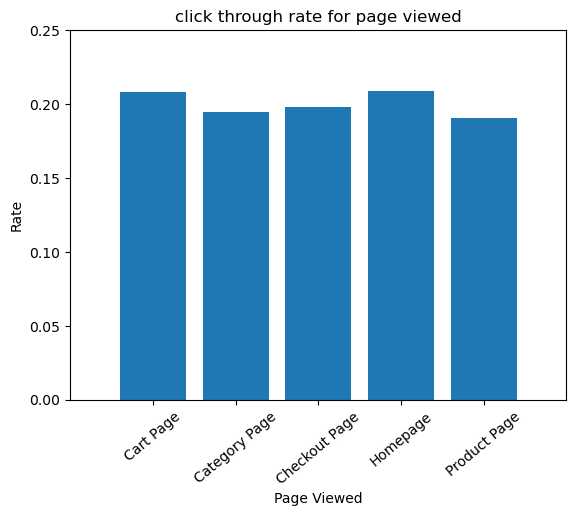

In [168]:
## bar graph for click through rate 
import matplotlib.pyplot as plt
x=[]
for i,value in grouped:   ## x denotes Page_Viewed
    x.append(i) 
y=click_thru_rate
plt.bar(x,y)
plt.title('click through rate for page viewed')
plt.axis([-1.0000,5.0000,0.0000,0.2500])
plt.xticks(rotation=40)
plt.xlabel("Page Viewed")
plt.ylabel("Rate")
plt.show()


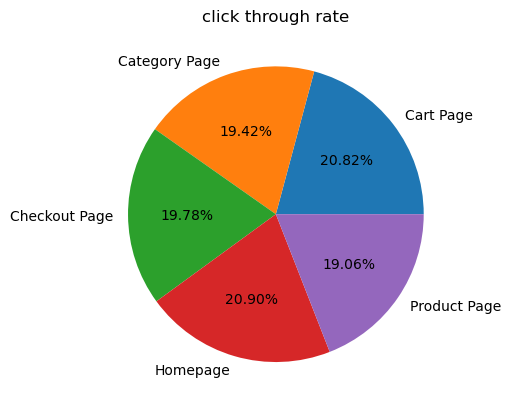

In [169]:
## pie plot for click through rate
import matplotlib.pyplot as plt
x=[]
for i,value in grouped:   ## x denotes Page_Viewed
    x.append(i) 
y=click_thru_rate
plt.title('click through rate')
plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

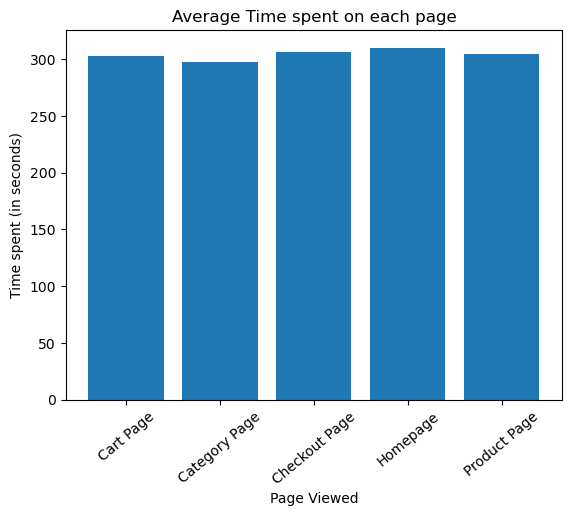

In [171]:
## average time spent on each page
avg_time=cleaned_data.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()

plt.bar(avg_time.index,avg_time.values)
plt.title('Average Time spent on each page')
plt.xlabel('Page Viewed')
plt.ylabel('Time spent (in seconds)')
plt.xticks(rotation=40)
plt.show()

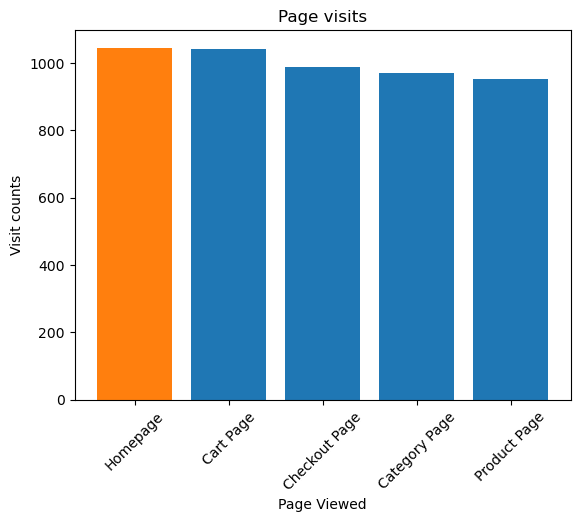

In [161]:
import matplotlib.pyplot as plt
count=cleaned_data['Page_Viewed'].value_counts()
plt.bar(count.index,count.values)
plt.xlabel("Page Viewed")
plt.xticks(rotation=45)
plt.ylabel("Visit counts")
plt.title('Page visits')
x=count.idxmax()  #most visited page
y=count.max()     #most visited page count
plt.bar(x,y)
plt.show()